# 탐색적 자료분석 5주차 과제

# 202115789 통계학과 김지우

# Problem 1

## 국가별 1인당 GNP 자료에 대한 전체 국가의 평균 GNP를 추정하고자 한다.

In [1]:
getwd()

[1] "C:/Users/woo/Desktop/Project/class_2022EDA/Problem"

In [5]:
library('tidyverse')
library('xlsx')

Warning message:
"패키지 'xlsx'는 R 버전 4.1.3에서 작성되었습니다"


In [98]:
df = read.xlsx('GNP.xlsx', header = T, sheetIndex = 1, encoding="UTF-8")
GNP = df[,3]
GNP = GNP[-which(GNP == '　')] %>% as.numeric

In [101]:
head(GNP)

[1] 104673  83922  72849  63830  59924  58084

## 1) stem and leaf 와 box plot을 그리고 탐색하여라.

- 아래는 GNP의 줄기와 잎 그림이다.

- 한 쪽에 분포가 쏠려 있음이 특징적이다.

In [108]:
stem(GNP, scale = 2)


  The decimal point is 4 digit(s) to the right of the |

   0 | 00000000000000000000000011111111111111111111111111111111111222222222+20
   0 | 55555666666677777888899999
   1 | 00011223444
   1 | 5666778
   2 | 00123
   2 | 678
   3 | 002244
   3 | 56
   4 | 023333
   4 | 56667
   5 | 0
   5 | 78
   6 | 04
   6 | 
   7 | 3
   7 | 
   8 | 4
   8 | 
   9 | 
   9 | 
  10 | 
  10 | 5



- 그림 1은 GNP의 상자 그림이다.

- 상자그림 역시 분포가 한 쪽에 쏠려있다.

- 따라서 해당 자료를 가지고 신뢰구간을 구하는 것은 활용도가 떨어진다.

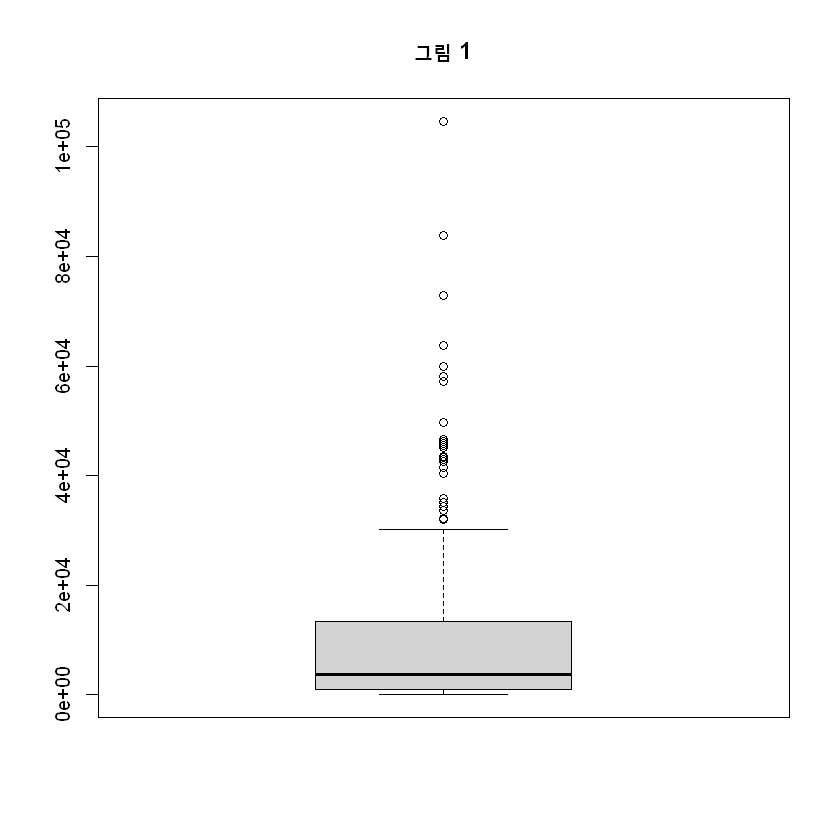

In [125]:
boxplot(GNP, main = '그림 1')

- 결과적으로 위의 줄기 잎 그림과 상자 그림을 관찰해보니 값이 작은 쪽에 몰려있음을 알 수 있다.
- 오른쪽 꼬리가 길다.

## 2) 모평균에 대한 95% 신뢰구간을 구하라.

In [128]:
sample_mean = mean(GNP)
sample_stdev = sd(GNP)
sample_size = length(GNP)

alpha = 0.05

t_star = qt(1-alpha/2, df = sample_size - 1)
SE = sample_stdev / sqrt(sample_size)

CI = c(sample_mean - t_star*SE, sample_mean + t_star*SE)
CI

[1]  8912.796 14138.947

- $\therefore$ 모평균에 대한 95% 신뢰구간은 8912.796 to 14138.946 이다.

## 3) 대칭화를 위한 적잘한 변환을 하여라.

- 그림 2는 자료를 로그변환한 것의 상자그림이다. 대략 대칭이다.

In [126]:
log_GNP = log(GNP)

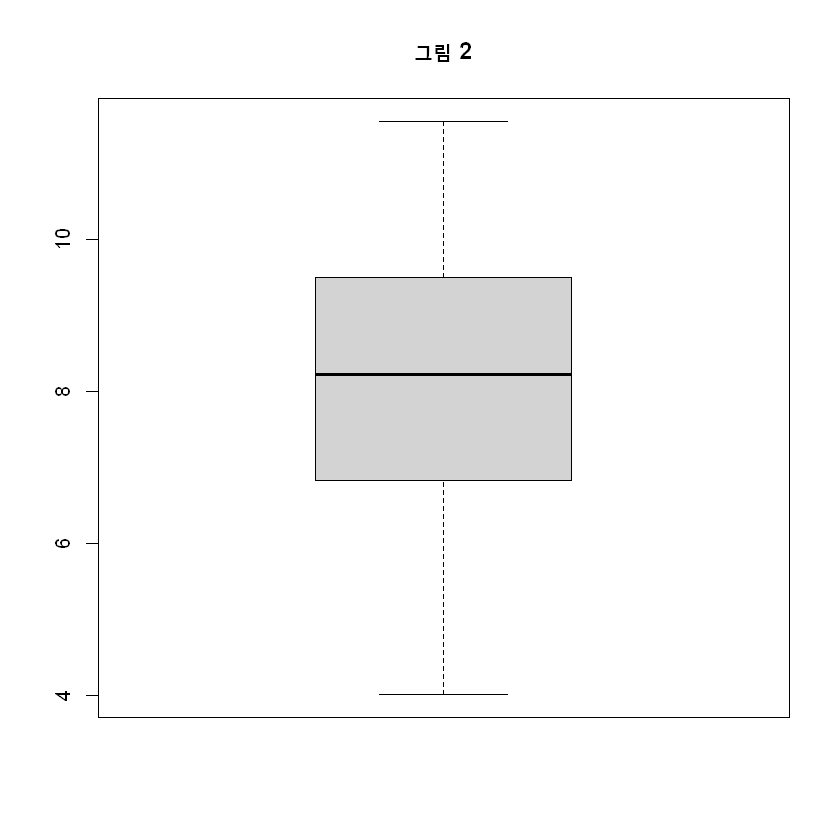

In [127]:
boxplot(log_GNP, main = '그림 2')

In [ ]:
- 그림 4는 자료를 로그변환한 것의 히스토그램인데 종모양을 띄며 대략 대칭이다.

- 

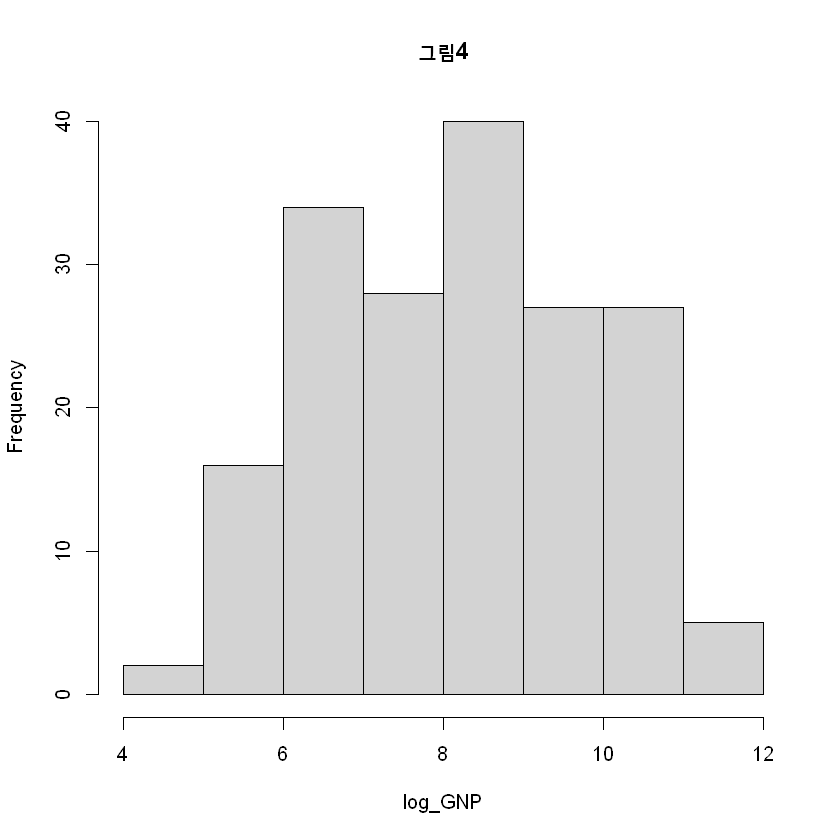

In [131]:
hist(log_GNP, main = '그림4')

## 4) 변환된 자료를 가지고 모평균에 대한 95% 신뢰구간을 구하라.

In [129]:
log_sample_mean = mean(log_GNP)
log_sample_stdev = sd(log_GNP)
log_sample_size = length(log_GNP)

alpha = 0.05

t_star = qt(1-alpha/2, df = log_sample_size - 1)
SE = log_sample_stdev / sqrt(log_sample_size)

CI = c(log_sample_mean - t_star*SE, log_sample_mean + t_star*SE)
CI

[1] 7.953906 8.441641

- 변환된 자료에서 모평균에 대한 95% 신뢰구간은 7.953 to 8.441 이다.

## 5) 1) 과 3)의 결과를 탐색하여라

- 신뢰구간은 t-분포 근사를 사용하여 구했는데 변환하지 않은 자료는 비대칭이 너무 심하여 신뢰구간을 구하더라도 오차가 매우 심할 것으로 생각된다. 그에 비하여 변환한 자료는 대칭성이 확보되었으므로 신뢰구간의 타당성이 증가하였다.

# Problem 2

### 확대경으로 물체를 볼 경우 랜즈를 통하여 본 물체의 외견상의 크기(image size)와 랜즈로 부터 물체의 거리(object distance)와는 관계가 있다. 다음은 실험을 통하여 얻은 자료이다. 

### 적절한 변수변환을 하여 직선을 추정하여 두 변수의 관계에 관해 논하시오

In [2]:
object_distance = 12:22
image_size = c(12, 9.4, 7.2, 6.2, 5.2, 4.5, 4.0, 3.6, 3.2, 3.0, 2.7) 

In [3]:
lens = rbind(object_distance, image_size)
lens

object_distance,12,13.0,14.0,15.0,16.0,17.0,18,19.0,20.0,21,22.0
image_size,12,9.4,7.2,6.2,5.2,4.5,4,3.6,3.2,3,2.7


- 아래 그림 1은 image size에 따른 object distance를 산점도로 나타낸 것이다. 

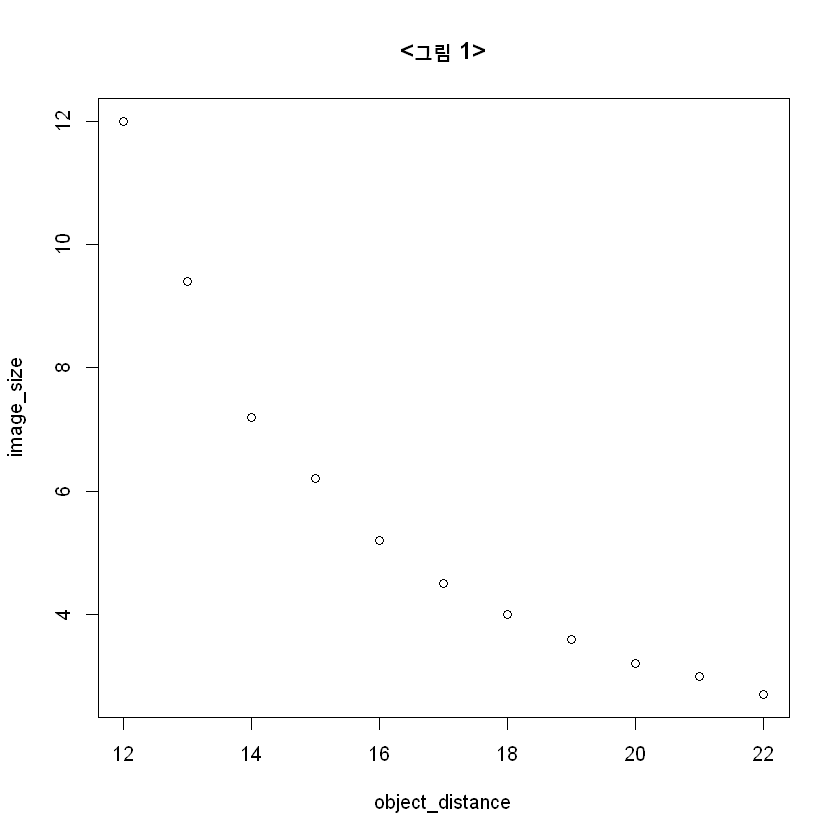

In [7]:
plot(object_distance, image_size, main = '<그림 1>')

- 아래 <그림 2> 는 image size에 로그 변환을 하여 산점도로 나타낸 것이다. 직선 형태를 띄고 있다.
- 결론적으로 image size와 object distance는 음의 상관관계를 가지며 object_distance와 log(object distance)는 직선 관계에 있다.

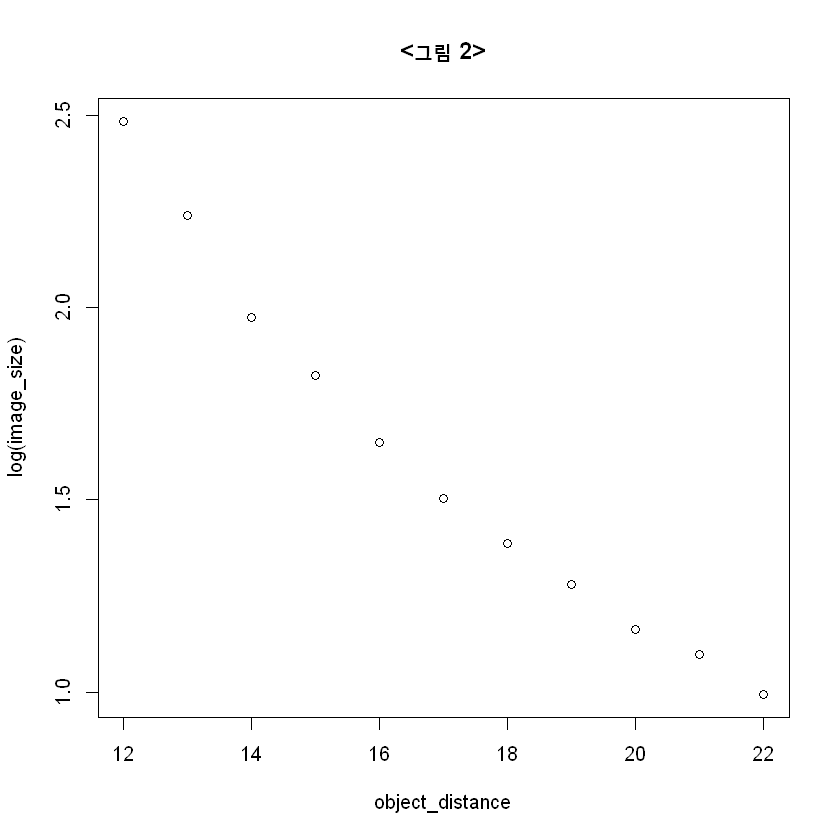

In [15]:
plot(object_distance, log(image_size), main = '<그림 2>')